# Simulate Discrete Distribution from Sample
Using Julia, fit a data sample to a Discrete distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000.

## 0. Import packages and define SimulateDiscreteDistributionFromSample function
Install (if necessary) and import the functions necessary to run the SimulateDiscreteDistributionFromSample function. Then define the function for later use. 

In [77]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")
# Pkg.add("CategoricalArrays")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
using CategoricalArrays
gr()
theme(:bright)

function SimulateCategoricalDistributionFromSample(
    dataframe::DataFrame,
    column_name::String,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Ensure column is a Categorical type
    dataframe[:, column_name] = CategoricalArray(dataframe[:, column_name])
    # Group and summarize sample by Categorical variable
    GDF_dataframe = groupby(dataframe, column_name)
    GDF_dataframe = combine(
        GDF_dataframe, 
        nrow .=> "Occurences"
    )
    GDF_dataframe[:, "Probability"] = GDF_dataframe[:, "Occurences"] / nrow(dataframe)
    # Show probability distribution of categories
    println("Here is the probability distribution based on your sample:")
    print(GDF_dataframe[:, [column_name, "Probability"]])
    # Conduct simulation
    Arr_CategoricalDistSim = sample(
        GDF_dataframe[:, column_name], 
        Weights(GDF_dataframe[:, "Probability"]),
        trials, 
        replace= true
    )
    Arr_CategoricalDistSim = reshape(Arr_CategoricalDistSim, length(Arr_CategoricalDistSim), 1)
    DF_CategoricalDistSim = DataFrame(Arr_CategoricalDistSim, :auto)
    # Group and summarize by outcomes
    GDF_CategoricalDistSim = groupby(DF_CategoricalDistSim, "x1")
    GDF_CategoricalDistSim = combine(GDF_CategoricalDistSim, nrow)
    # # Get kernel density estimates for sample and simulation
    # kde_sample = kde(dataframe[:, column_name])
    # kde_simulation = kde(DF_CategoricalDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Categorical Distribution: " * column_name
        p = bar(
            GDF_CategoricalDistSim[:, "x1"], 
            GDF_CategoricalDistSim[:, "nrow"],
            fillalpha= 0.4, 
            label= "Simulated Outcomes", 
            title= title_for_plot, 
            xlabel= column_name
        )
        # plot!(kde_simulation.x, kde_simulation.density .* length(DF_CategoricalDistSim[:, "x1"]) .* 0.175, linewidth = 3, color = 1, label="Density of Simulation")
        # plot!(kde_sample.x, kde_sample.density .* length(DF_CategoricalDistSim[:, "x1"]) .* 0.5, linewidth = 3, color = 2, label="Density of Sample")
        display(p)
    end
    # Return simulation results
    return DF_CategoricalDistSim
end

SimulateCategoricalDistributionFromSample (generic function with 6 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [68]:
# using Pkg
# Pkg.add("StatsBase")
using StatsBase  # Enables access to sample()

DiscreteOutcomes = ["Heart", "Diamond", "Club", "Spade"]
Arr_RandomOutcomes = sample(DiscreteOutcomes, 50)
Arr_RandomOutcomes = reshape(Arr_RandomOutcomes, length(Arr_RandomOutcomes), 1)
DF_RandomOutcomes = DataFrame(Arr_RandomOutcomes, :auto)


50-element Vector{String}:
 "Heart"
 "Diamond"
 "Club"
 "Heart"
 "Heart"
 "Club"
 "Heart"
 "Heart"
 "Diamond"
 "Heart"
 "Heart"
 "Diamond"
 "Diamond"
 ⋮
 "Club"
 "Spade"
 "Heart"
 "Club"
 "Diamond"
 "Heart"
 "Club"
 "Heart"
 "Spade"
 "Diamond"
 "Heart"
 "Diamond"

## 2. Use the SimulateCategoricalDistributionFromSample function
Use the SimulateCategoricalDistributionFromSample function to simulate a Categorical distribution from your sample dataset.

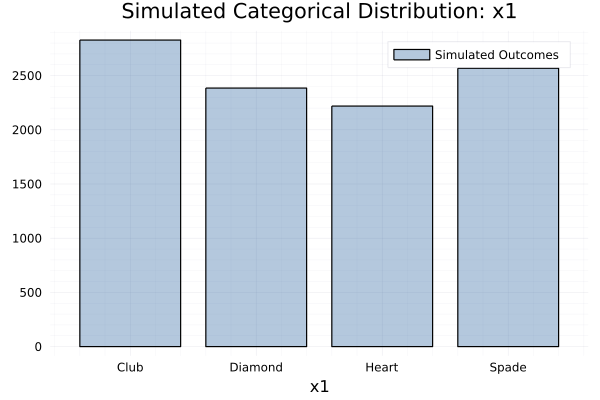

Here is the probability distribution based on your sample:
4×2 DataFrame
 Row │ x1       Probability 
     │ String   Float64     
─────┼──────────────────────
   1 │ Spade           0.26
   2 │ Club            0.28
   3 │ Heart           0.22
   4 │ Diamond         0.24

,x1
,String
1,Club
2,Diamond
3,Diamond
4,Heart
5,Heart
6,Spade
7,Diamond
8,Spade
9,Club


In [78]:
DF_Sim = SimulateCategoricalDistributionFromSample(DF_RandomOutcomes, "x1")